In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.mixture import GaussianMixture

from sklearn import metrics

# Prepare the Data

In [ ]:
df = pd.read_excel('https://query.data.world/s/kdys6uqv5oazrf3av62phbqyimd2qh')
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [ ]:
# Hanya menggunakan data kandungan nutrisi
df = df.drop(['Shrt_Desc', 'GmWt_1', 'GmWt_Desc1',	'GmWt_2',	'GmWt_Desc2',	'Refuse_Pct'], axis=1)
df.head()

,NDB_No,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg)
0,1001,15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0
1,1002,16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0
2,1003,0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0
3,1004,42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0
4,1005,41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0


In [ ]:
df.shape

(8790, 47)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NDB_No             8790 non-null   int64  
 1   Water_(g)          8789 non-null   float64
 2   Energ_Kcal         8790 non-null   int64  
 3   Protein_(g)        8790 non-null   float64
 4   Lipid_Tot_(g)      8790 non-null   float64
 5   Ash_(g)            8465 non-null   float64
 6   Carbohydrt_(g)     8790 non-null   float64
 7   Fiber_TD_(g)       8196 non-null   float64
 8   Sugar_Tot_(g)      6958 non-null   float64
 9   Calcium_(mg)       8442 non-null   float64
 10  Iron_(mg)          8646 non-null   float64
 11  Magnesium_(mg)     8051 non-null   float64
 12  Phosphorus_(mg)    8211 non-null   float64
 13  Potassium_(mg)     8364 non-null   float64
 14  Sodium_(mg)        8707 non-null   float64
 15  Zinc_(mg)          8084 non-null   float64
 16  Copper_mg)         7533 

In [ ]:
df.isnull().sum()

NDB_No                  0
Water_(g)               1
Energ_Kcal              0
Protein_(g)             0
Lipid_Tot_(g)           0
Ash_(g)               325
Carbohydrt_(g)          0
Fiber_TD_(g)          594
Sugar_Tot_(g)        1832
Calcium_(mg)          348
Iron_(mg)             144
Magnesium_(mg)        739
Phosphorus_(mg)       579
Potassium_(mg)        426
Sodium_(mg)            83
Zinc_(mg)             706
Copper_mg)           1257
Manganese_(mg)       2160
Selenium_(µg)        1700
Vit_C_(mg)            818
Thiamin_(mg)          634
Riboflavin_(mg)       616
Niacin_(mg)           637
Panto_Acid_mg)       2242
Vit_B6_(mg)           905
Folate_Tot_(µg)      1261
Folic_Acid_(µg)      2039
Food_Folate_(µg)     1768
Folate_DFE_(µg)      2057
Choline_Tot_ (mg)    4016
Vit_B12_(µg)         1193
Vit_A_IU              711
Vit_A_RAE            1535
Retinol_(µg)         1806
Alpha_Carot_(µg)     3258
Beta_Carot_(µg)      3162
Beta_Crypt_(µg)      3270
Lycopene_(µg)        3292
Lut+Zea_ (µg

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
products = df['NDB_No'].values
features = df.iloc[:, 1:].values

In [ ]:
features_norm = preprocessing.normalize(features)

In [ ]:
# PCA ke 2 dimensi untuk visualisasi
pca = PCA(n_components = 2)
Z_PCA = pca.fit_transform(features_norm)

# Clustering I: K-Means

In [ ]:
silhouette = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(features_norm)
  labels = kmeans.labels_
  silhouette.append(metrics.silhouette_score(features_norm, labels, metric='euclidean'))

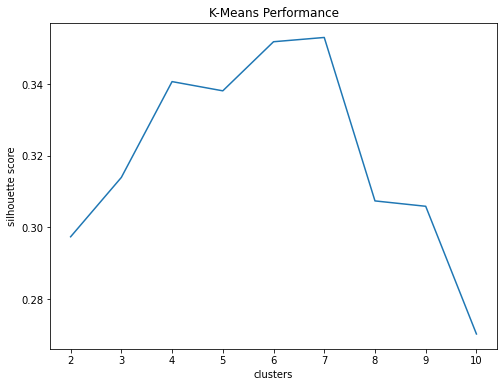

In [ ]:
i = list(range(2,11))
plt.figure(figsize=(8,6))
plt.plot(i, silhouette)
plt.xlabel("clusters")
plt.ylabel("silhouette score")
plt.title("K-Means Performance")
plt.show()

In [ ]:
# Get the indices of maximum silhouette
max_index = np.where(silhouette == np.amax(silhouette))
max_index =  max_index[0] + 2

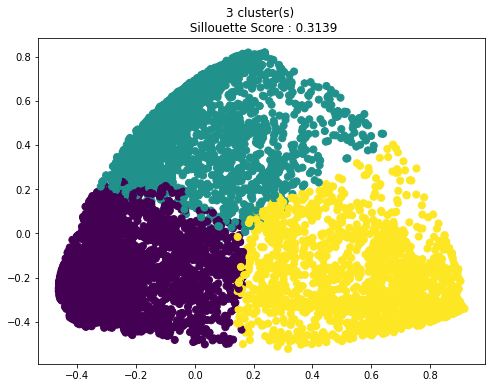

In [ ]:
# n = max_index[0]
n = 3
kmeans = KMeans(n_clusters=n)
kmeans.fit(features_norm)
labels = kmeans.labels_
silhouette = metrics.silhouette_score(features_norm, labels, metric='euclidean')

plt.figure(figsize=(8, 6))
plt.scatter(Z_PCA[:, 0], Z_PCA[:, 1], c=labels, s=50, cmap='viridis')
plt.title("{} cluster(s) \n Sillouette Score : {:.4f}" .format(n,silhouette))
plt.show()

# Clustering II: Agglomerative Hierarchical Clustering

In [ ]:
# plt.figure(figsize=(15,8))
# plt.ylabel('Distance')
# plt.xlabel('Samples')
# dendrogram = sch.dendrogram(sch.linkage(features_norm, method='ward'))

In [ ]:
silhouette = []

for i in range(2,11):
  agglomerative_hierarchical_clustering_model = AgglomerativeClustering(n_clusters=i)
  clusters = agglomerative_hierarchical_clustering_model.fit_predict(features_norm)
  silhouette.append(metrics.silhouette_score(features_norm, clusters, metric='euclidean'))

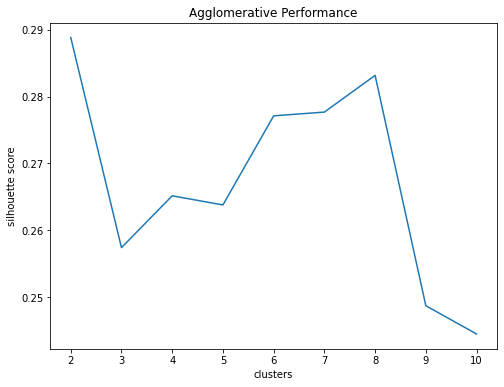

In [ ]:
i = list(range(2,11))
plt.figure(figsize=(8,6))
plt.plot(i, silhouette)
plt.xlabel("clusters")
plt.ylabel("silhouette score")
plt.title("Agglomerative Performance")
plt.show()

In [ ]:
# Get the indices of maximum element in numpy array
max_index = np.where(silhouette == np.amax(silhouette))
max_index =  max_index[0] + 2

In [ ]:
# n = max_index[0]
n = 2
agglomerative_hierarchical_clustering_model = AgglomerativeClustering(n_clusters=n)
clusters = agglomerative_hierarchical_clustering_model.fit_predict(features_norm)

In [ ]:
silhouette = metrics.silhouette_score(features_norm, clusters, metric='euclidean')

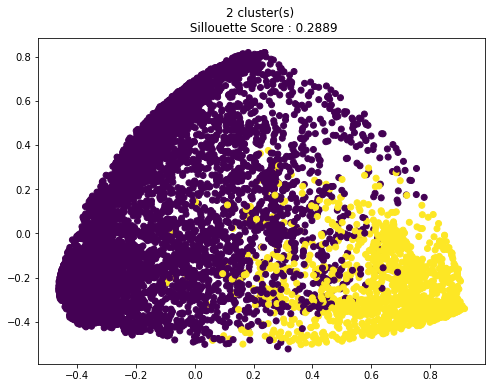

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Z_PCA[:, 0], Z_PCA[:, 1], c=clusters, cmap='viridis')
plt.title("{} cluster(s) \n Sillouette Score : {:.4f}" .format(n,silhouette))
plt.show()

# Clustering III: Gaussian Mixture Model

In [ ]:
silhouette = []

for i in range(2,11):
  model = GaussianMixture(n_components=i)
  model.fit(features_norm)
  yhat = model.predict(features_norm)
  silhouette.append(metrics.silhouette_score(features_norm, yhat, metric='euclidean'))

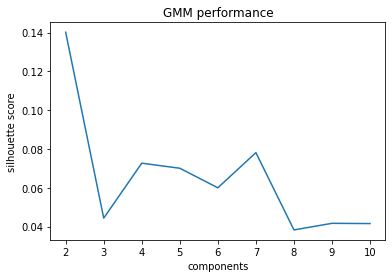

In [ ]:
i = list(range(2,11))
plt.plot(i, silhouette)
plt.xlabel("components")
plt.ylabel("silhouette score")
plt.title("GMM performance")
plt.show()

In [ ]:
# Get the indices of maximum element in numpy array
max_index = np.where(silhouette == np.amax(silhouette))
max_index =  max_index[0] + 2

In [ ]:
# n = max_index[0]
n = 3
model = GaussianMixture(n_components=n) # Sesuaikan dengan silhouette tertinggi
model.fit(features_norm)
clusters = model.predict(features_norm)

In [ ]:
silhouette = metrics.silhouette_score(features_norm, clusters, metric='euclidean')

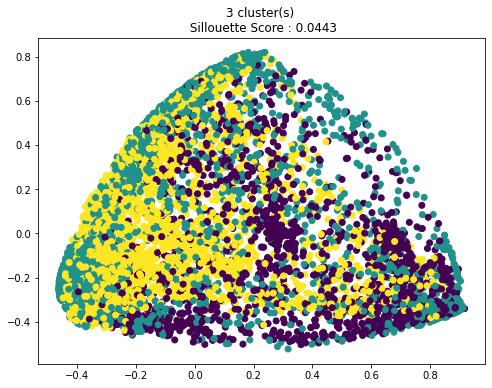

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Z_PCA[:, 0], Z_PCA[:, 1], c=clusters, cmap='viridis')
plt.title("{} cluster(s) \n Sillouette Score : {:.4f}" .format(n,silhouette))
plt.show()